In [1]:
!pip3 install yfinance
!pip3 install pandas_datareader

DEPRECATION: Loading egg at /Library/anaconda3/lib/python3.11/site-packages/python_magic-0.4.27-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Library/anaconda3/lib/python3.11/site-packages/etllib-1.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Library/anaconda3/lib/python3.11/site-packages/iso8601-2.1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Library/anaconda3/lib/python3.11/site-packages/python_magic-0.4.27-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Library/anaconda3/lib/python3.11/site-packages/etllib-1.1-py3.

### Импортируем библиотек и подготовка датасета

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

from datetime import datetime

In [5]:
tech_list = ["AAPL", "GOOG", "MSFT", "AMZN"]

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

In [6]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [8]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

for company, com_name in zip(company_list, company_name):
    company['company_name'] = com_name

df = pd.concat(company_list, axis=0)

In [10]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-03-22,177.750000,179.259995,176.750000,178.869995,178.869995,27964100,AMAZON
2024-03-25,178.009995,180.990005,177.240005,179.710007,179.710007,29815500,AMAZON
2024-03-26,180.149994,180.449997,177.949997,178.300003,178.300003,29659000,AMAZON
2024-03-27,179.880005,180.000000,177.309998,179.830002,179.830002,33272600,AMAZON
2024-03-28,180.169998,181.699997,179.259995,180.380005,180.380005,38027400,AMAZON


### Описательная статистика

In [11]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,503.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,165.255965,167.012445,163.634135,165.402982,164.548555,6.964384e+07
std,18.712361,18.388499,18.934674,18.669243,18.959037,2.402601e+07
min,126.010002,127.769997,124.169998,125.019997,124.166634,2.404830e+07
25%,148.884995,150.930000,147.264999,149.375000,148.143013,5.246465e+07
50%,168.490005,169.850006,166.250000,167.529999,166.150604,6.513600e+07
75%,180.379997,182.079994,178.440002,180.640007,180.048981,8.038435e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.826020e+08


In [12]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2022-03-29 to 2024-03-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          503 non-null    float64
 1   High          503 non-null    float64
 2   Low           503 non-null    float64
 3   Close         503 non-null    float64
 4   Adj Close     503 non-null    float64
 5   Volume        503 non-null    int64  
 6   company_name  503 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.4+ KB


### Данные на момент закрытия биржи

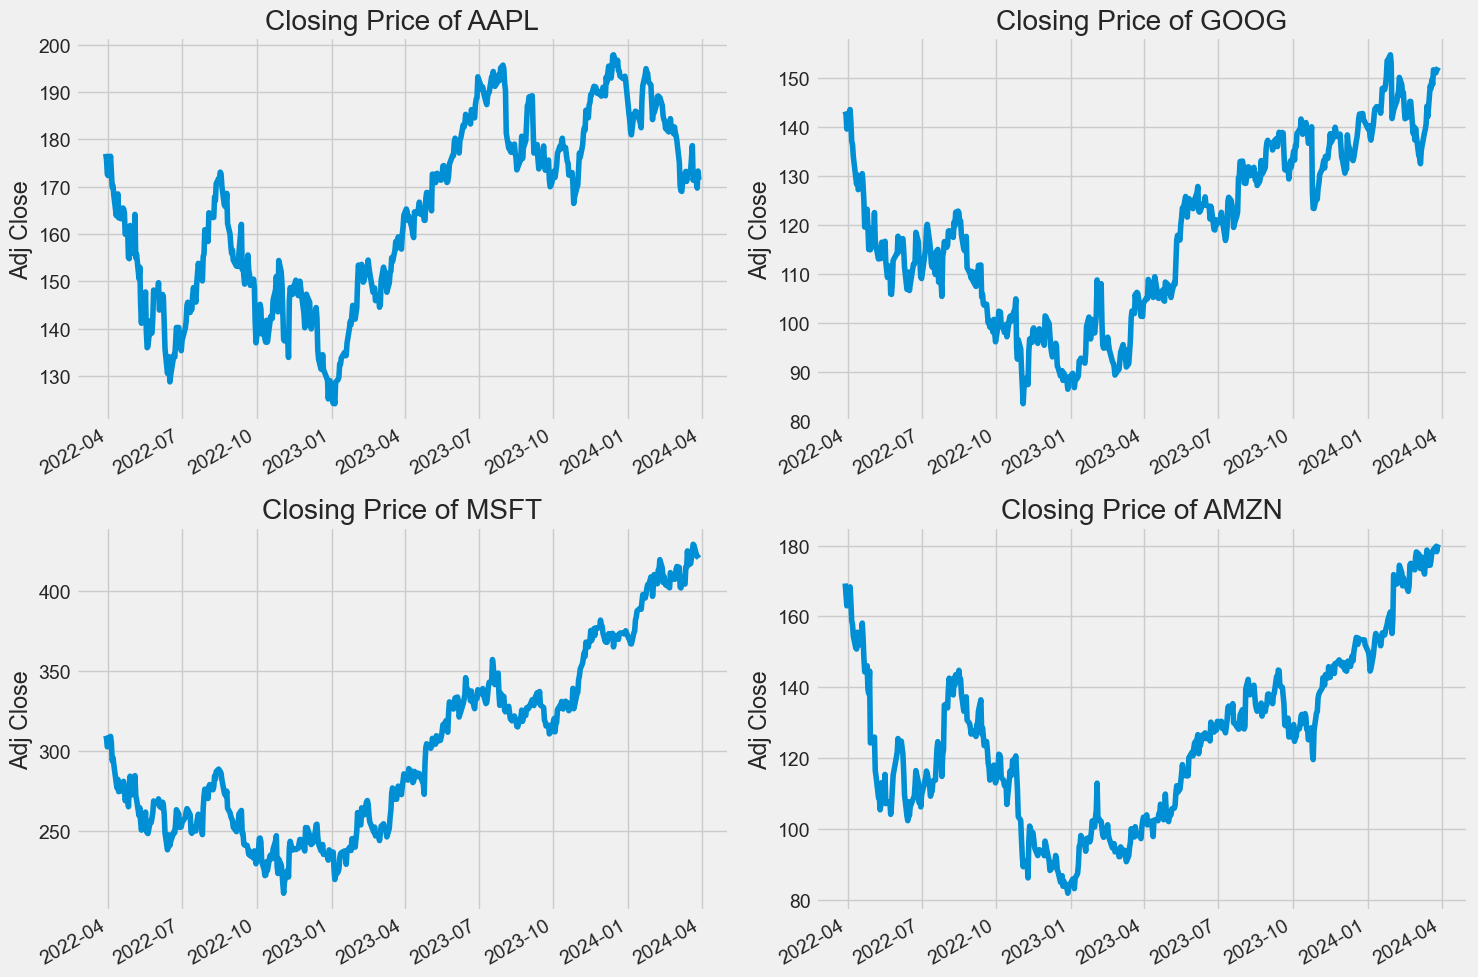

In [13]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i-1]}")

plt.tight_layout()

### Предсказание данных цены закрытия для компании Apple

In [15]:
df = pdr.get_data_yahoo('AAPL', start = '2012-01-01', end=datetime.now())


[*********************100%%**********************]  1 of 1 completed


In [16]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433826,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500645,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639427,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771555,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751302,394024400


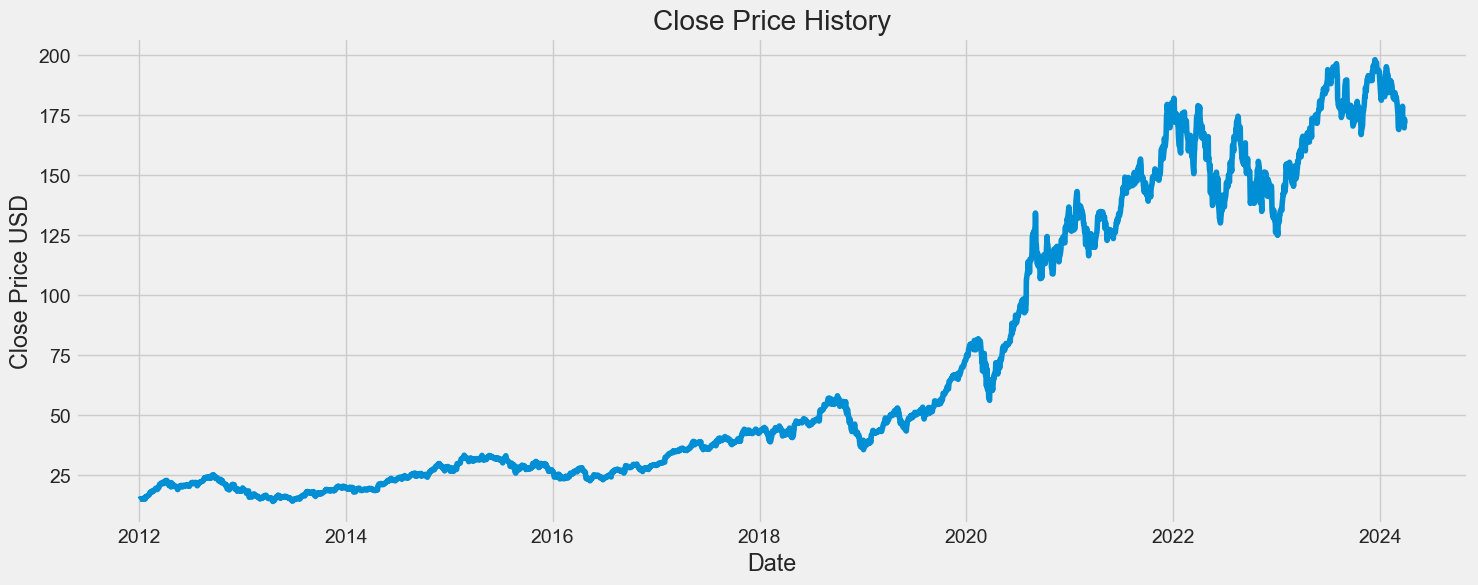

In [17]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.show()

In [18]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset)*0.95))
training_data_len

2926

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.8457884 ],
       [0.8653363 ],
       [0.85539942]])

In [24]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [23]:
x_train

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
        0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
        0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
        0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
        0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
        0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
        0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
        0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
        0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
        0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
        0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
        0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914]),
 0.042534249860459186,
 array([0.00444289, 0.00533302, 0.00618049, 0.00605056, 0.00634339,
        0.00620958, 0.00598462, 0.00567821, 0.00662652, 0.00748175,
        0.007218  , 0.0

In [25]:
x_train, y_train = np.array(x_train), np.array(y_train) 

In [27]:
x_train.shape

(2866, 60)

In [28]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [30]:
x_train.shape[1]

60

### Предсказание с использованием LSTM

In [33]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [35]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [36]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
2866/2866 [==============================] - 51s 17ms/step - loss: 0.0013
Epoch 2/3
2866/2866 [==============================] - 50s 17ms/step - loss: 5.2042e-04
Epoch 3/3
2866/2866 [==============================] - 50s 18ms/step - loss: 3.7642e-04
